In [1]:
# What is PCA and how to do it?
# 1. Find the set of correlated features - 
# 2. Convert into uncorrelated feature set - Mean Normalise the data, get Covariance Matrix
# 3. Find the Eigen Values - Perform Singular Value Decomposition to get eigen values and eigen vectors
# 4. Use Dot Product between the input matrix and eigenvectors and retain the top two candidates
# 5. Find the percentage of Retained Variance


In [16]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
C = A - M
print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
[3. 4.]
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]
[[4. 4.]
 [4. 4.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


In [152]:
# Create the PCA module

def compute_pca(X, n_components=2):
    
    # mean center the data
    X_demeaned = X - np.mean(X, axis = 0)

    # calculate the covariance matrix
    covariance_matrix = np.cov(X_demeaned, rowvar=False)

    # calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix)

    # sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    
    # reverse the order so that it's from highest to lowest.
    idx_sorted_decreasing = np.flip(idx_sorted)

    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:, idx_sorted_decreasing]

    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    eigen_vecs_subset = eigen_vecs_sorted[:, :n_components]

    # transform the data by multiplying the transpose of the eigenvectors with the transpose of the de-meaned data
    # Then take the transpose of that product.
    X_reduced = np.dot(eigen_vecs_subset.T, X_demeaned.T).T

    return X_reduced



In [153]:
compute_pca(A)

array([[-2.82842712,  0.        ],
       [ 0.        ,  0.        ],
       [ 2.82842712,  0.        ]])

In [92]:
from tensorflow.keras.datasets import boston_housing

In [98]:
(X_train, y_train), (X_test, Y_test) = boston_housing.load_data()

In [100]:
X_train.shape #m examples, n features

(404, 13)

In [101]:
import seaborn as sns

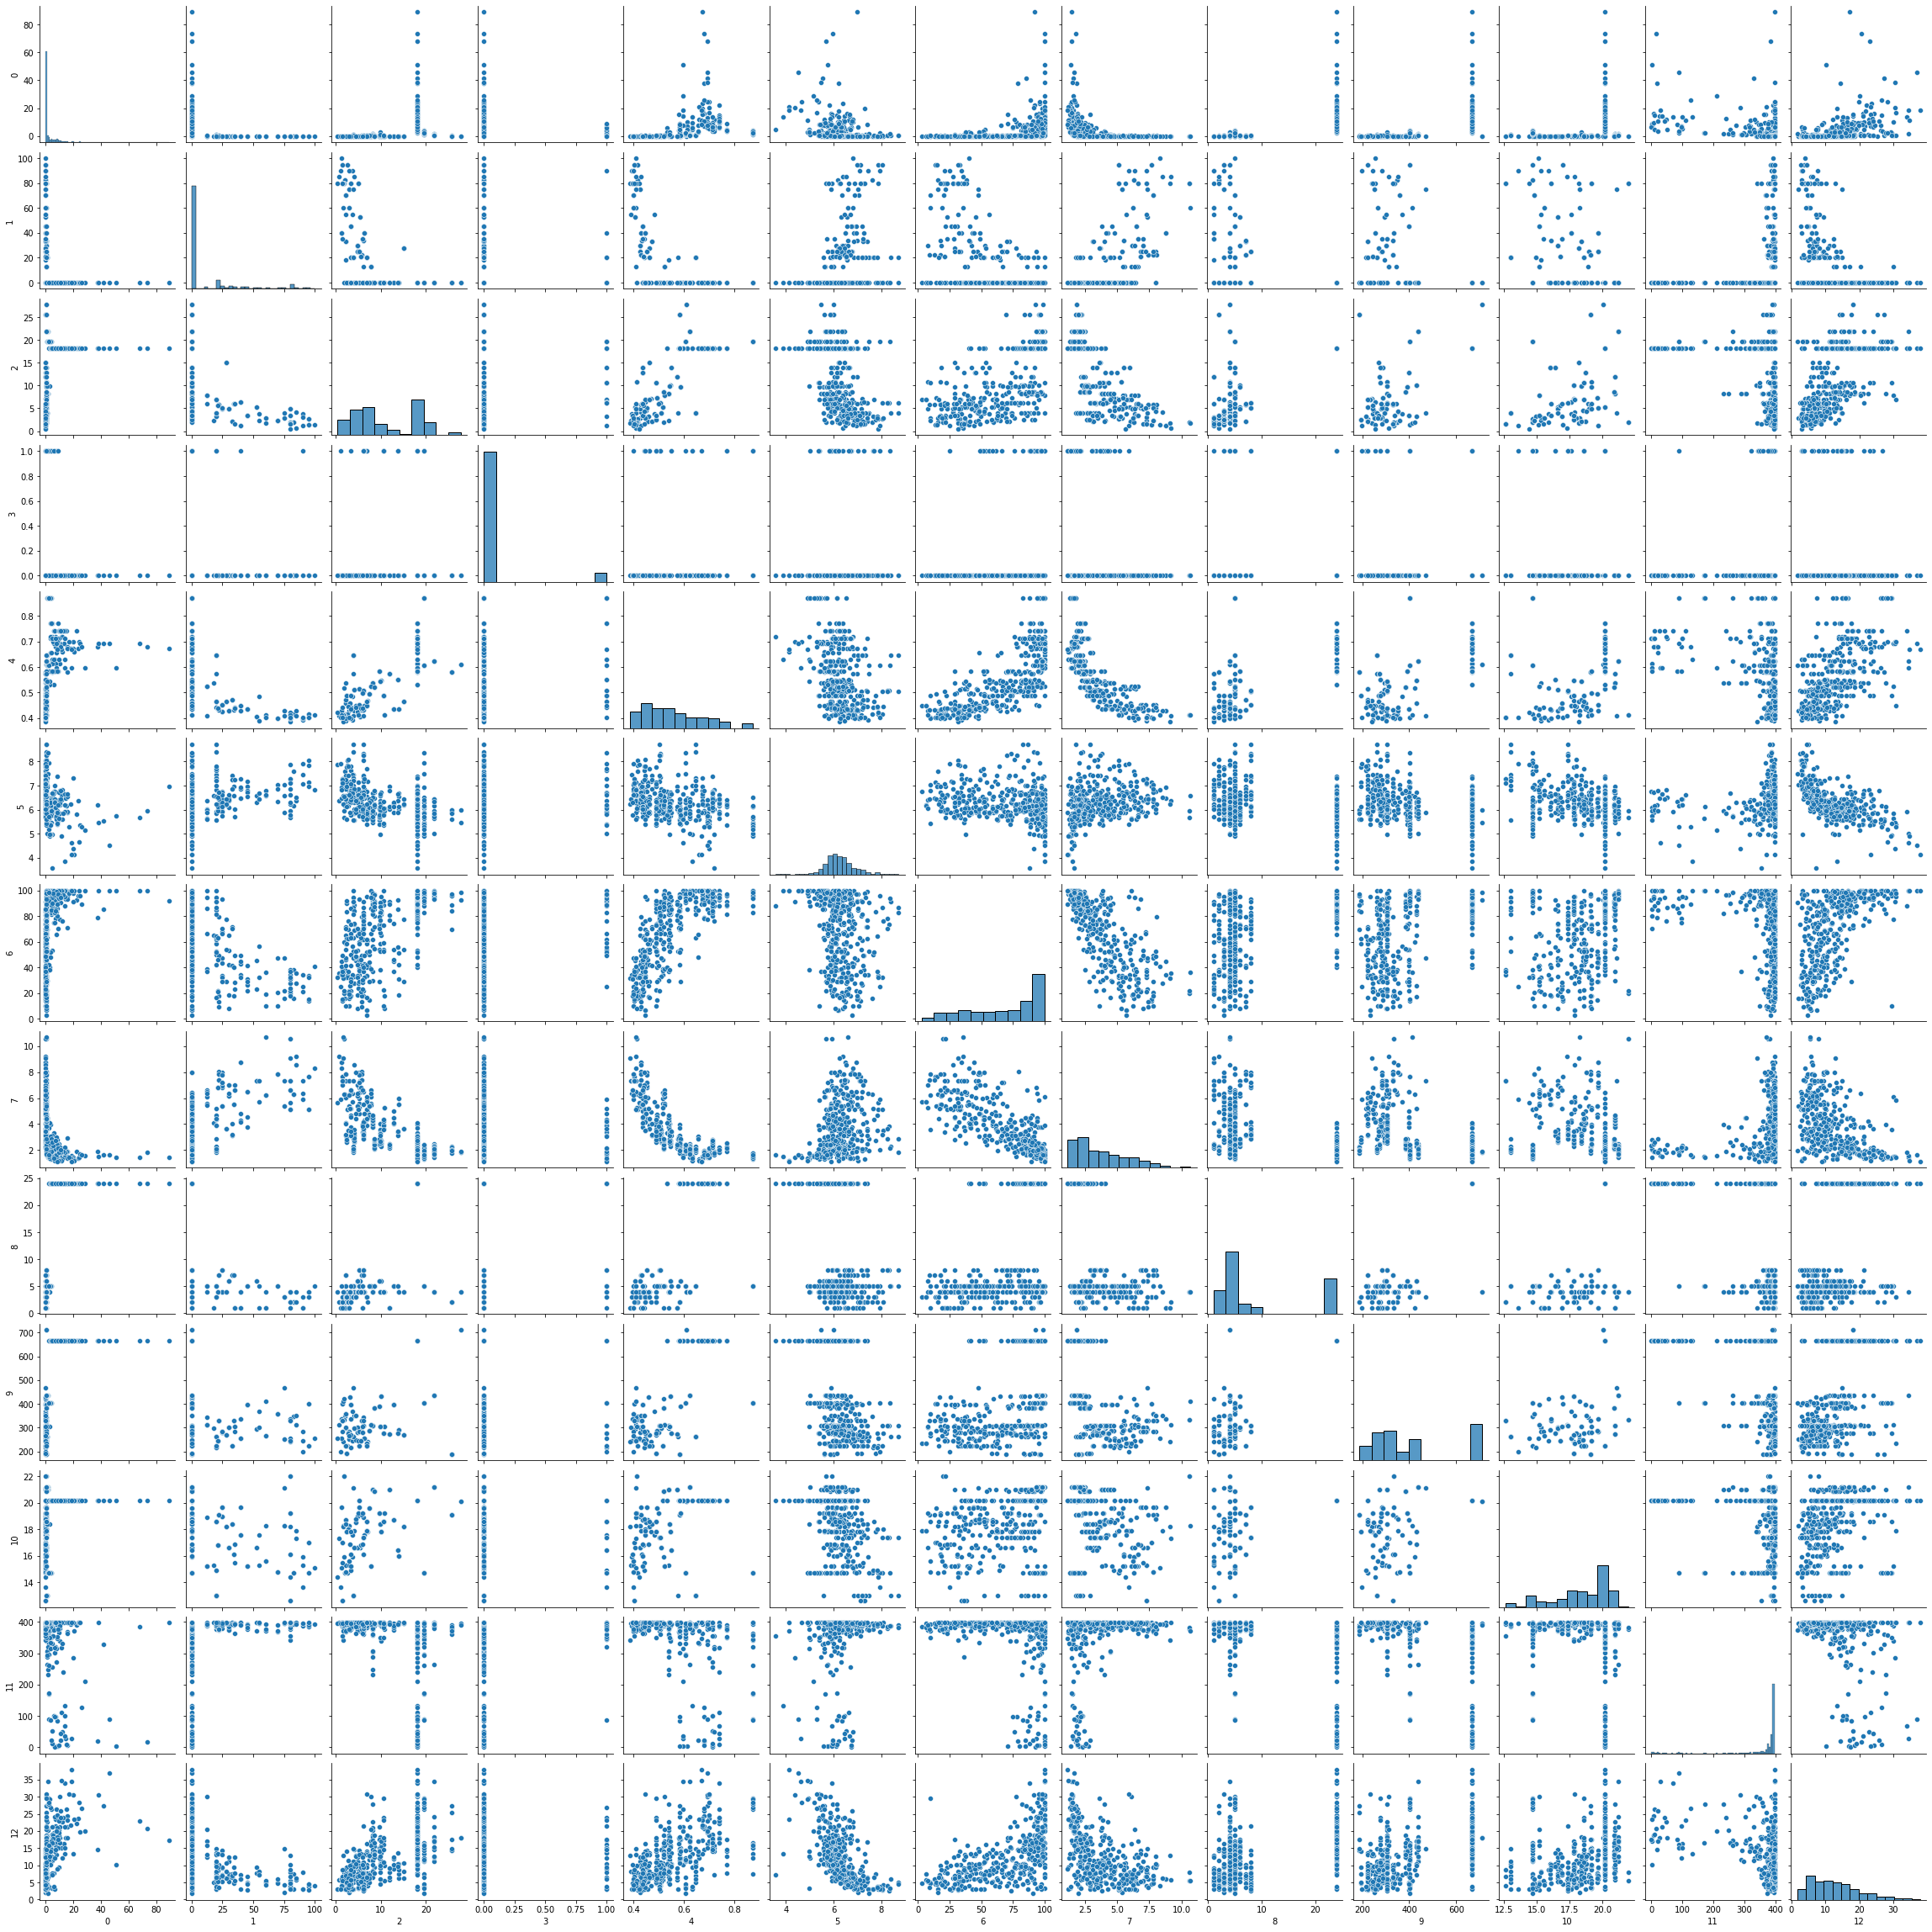

In [104]:
sns.pairplot(pd.DataFrame(X_train))

In [105]:
#identify and remove categorical data

In [111]:
X_projected = compute_pca(X_train, 5)

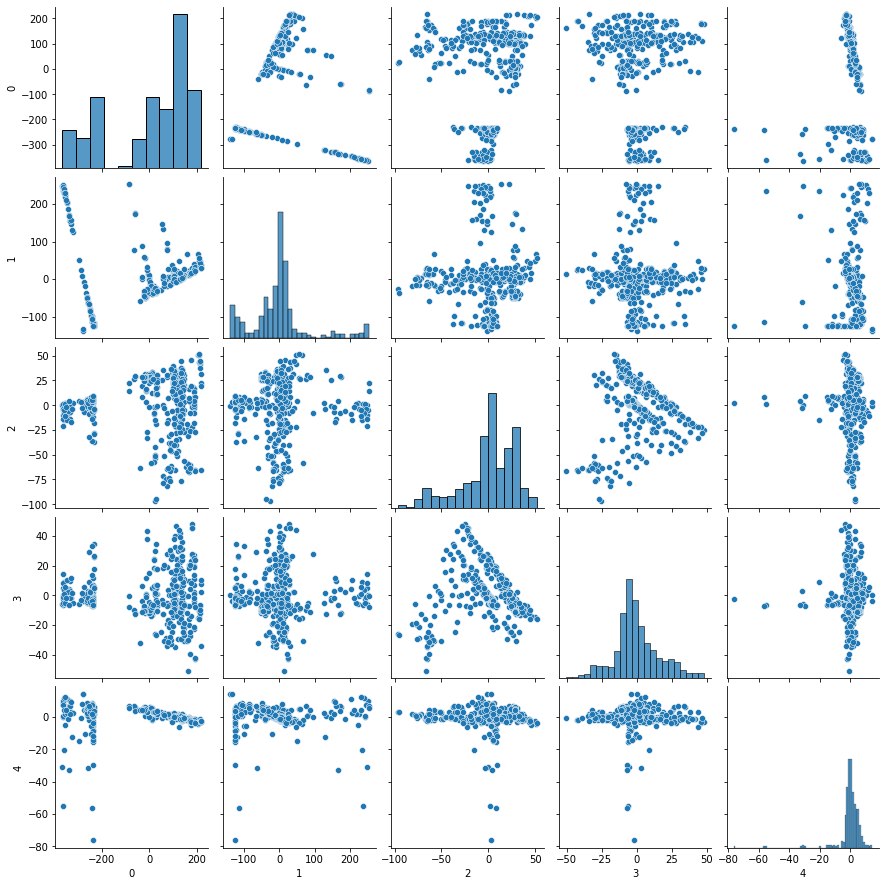

In [114]:
sns.pairplot(pd.DataFrame(X_projected))

In [142]:
x1 = np.random.randn(100)
x2 = np.random.randint(0,10) + np.random.randint(0,10)*x1
x3 = np.random.randint(0,10) + np.random.randint(0,10)*x1
x4 = np.random.randn(100)
x5 = np.random.randint(0,10) + np.random.randint(0,10)*x4
x6 = np.random.randint(0,10) + np.random.randint(0,10)*x4

In [143]:
XX = pd.DataFrame(np.array([x1,x2,x3,x4,x5,x6]).T)

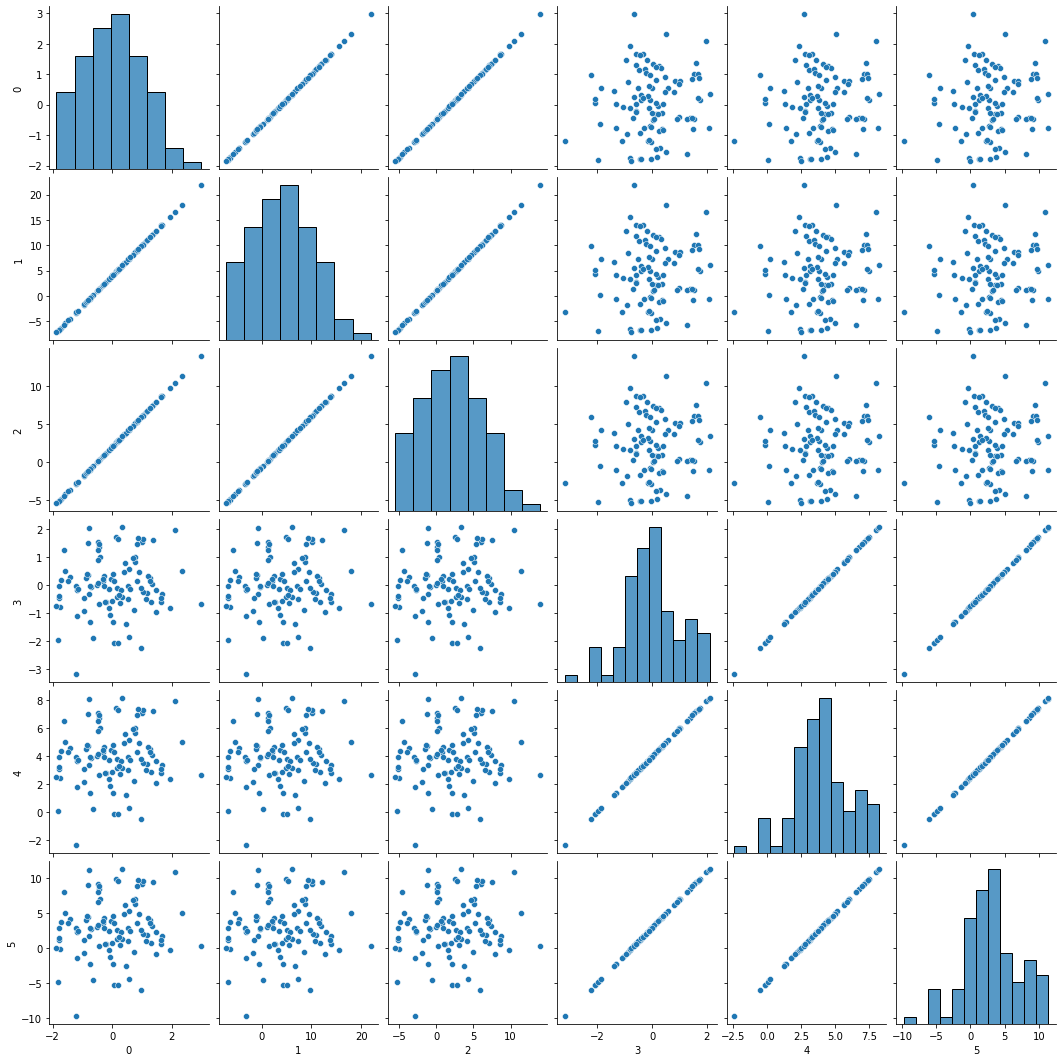

In [144]:
sns.pairplot(XX)

In [145]:
XX_projected = compute_pca(XX,6)

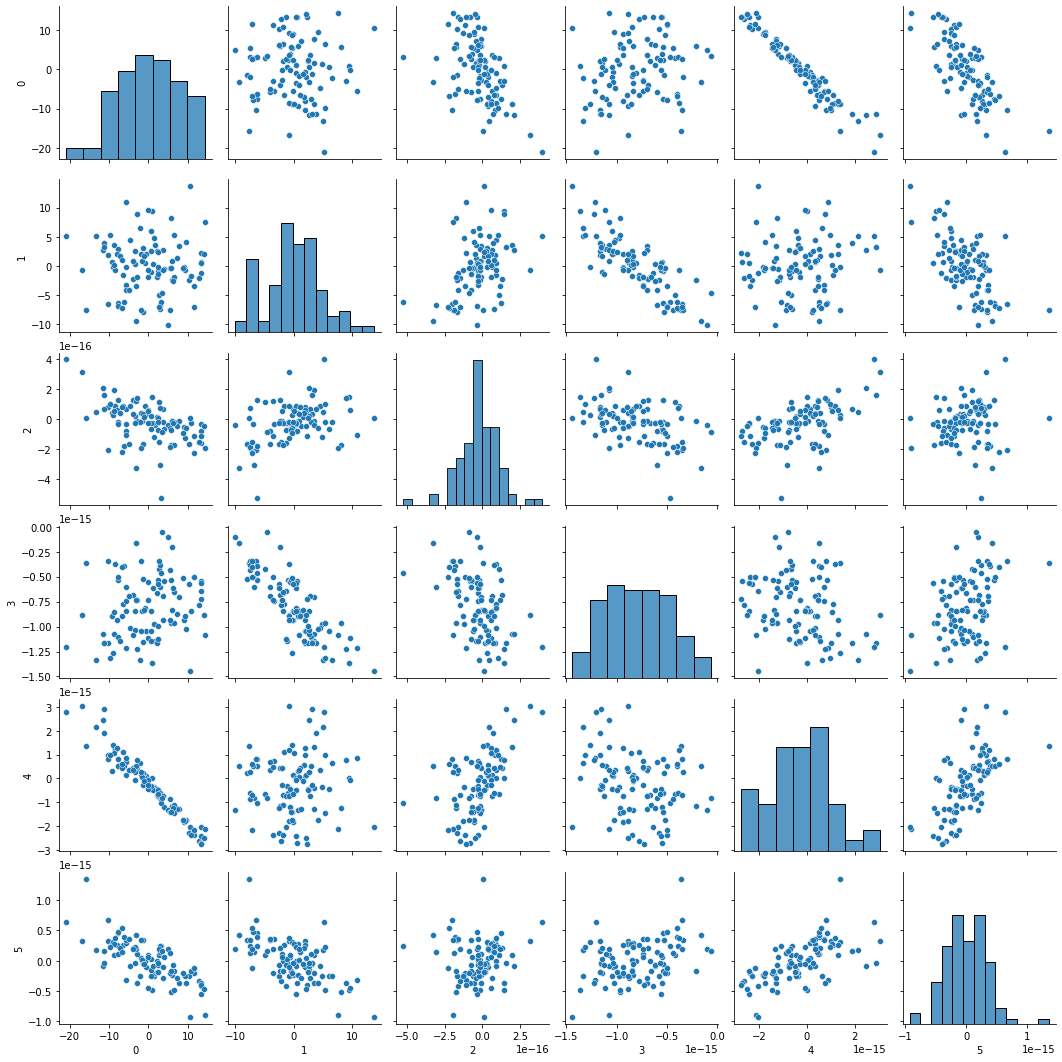

In [146]:
sns.pairplot(pd.DataFrame(XX_projected))

In [148]:
pd.DataFrame(XX_projected)

,0,1,2,3,4,5
0,2.126309,-1.842538,-2.770145e-17,-6.672840e-16,-7.165426e-16,2.995146e-18
1,-0.613038,1.987037,3.707462e-17,-1.040229e-15,1.151361e-16,-9.706393e-17
2,7.719807,3.427757,-9.770527e-18,-7.002627e-16,-1.281066e-15,-3.624349e-16
3,-16.787878,-0.738473,3.175078e-16,-8.868810e-16,3.060659e-15,3.286148e-16
4,-10.269825,1.867090,8.192145e-17,-1.165200e-15,9.976426e-16,3.257548e-16
...,...,...,...,...,...,...
95,2.779974,-7.039609,-1.510691e-16,-3.434161e-16,-6.872430e-16,1.952537e-16
96,3.689081,-0.700959,-1.771823e-17,-9.344050e-16,-7.597464e-16,-9.886004e-17
97,2.391675,-0.165204,-1.586548e-17,-5.714084e-16,-6.702811e-16,-3.240856e-17
98,-4.016685,0.939030,3.627544e-17,-1.080295e-15,3.357906e-16,1.929065e-16


In [149]:
XX

,0,1,2,3,4,5
0,-0.265859,2.404846,0.936564,0.349110,4.698219,4.396439
1,0.161039,4.966234,2.644156,-0.422741,3.154517,1.309034
2,-0.958100,-1.748602,-1.832401,-0.917038,2.165924,-0.668152
3,2.334369,18.006212,11.337475,0.521305,5.042610,5.085219
4,1.479234,12.875404,7.916936,-0.186389,3.627222,2.254443
...,...,...,...,...,...,...
95,-0.426444,1.441339,0.294226,1.463306,6.926612,8.853223
96,-0.463801,1.217194,0.144796,0.067206,4.134412,3.268824
97,-0.279134,2.325197,0.883465,-0.020866,3.958267,2.916535
98,0.611865,7.671190,4.447460,-0.121064,3.757872,2.515745
